## Setup Enviroment


In [3]:
import seaborn as sns
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette(sns.color_palette(custom_colors))
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [4]:
import kagglehub
ketangangal_heart_disease_dataset_uci_path = kagglehub.dataset_download('ketangangal/heart-disease-dataset-uci')

print('Data source import complete.')


100%|██████████| 9.24k/9.24k [00:00<00:00, 2.51MB/s]

Extracting files...
Data source import complete.


In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv(ketangangal_heart_disease_dataset_uci_path + '/HeartDiseaseTrain-Test.csv')

## Exploratory Data Analysis (EDA)

In [7]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [9]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [10]:
df.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [11]:
df.shape

(1025, 14)

In [12]:
df.duplicated().sum()

np.int64(723)

In [13]:
df.shape

(1025, 14)

## Data Visualization

C:\Users\tasne\AppData\Local\Temp\ipykernel_13064\2368968008.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)


<Axes: xlabel='age', ylabel='Count'>

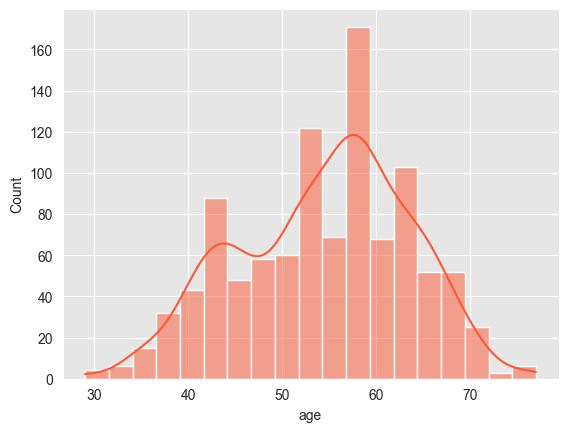

In [14]:
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)

<Axes: xlabel='age', ylabel='Count'>

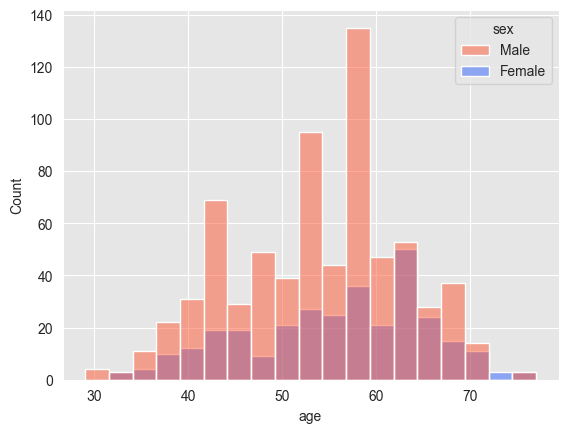

In [15]:
sns.histplot(data=df, x='age', hue='sex')

In [16]:
df['chest_pain_type'].value_counts()

chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

<Axes: xlabel='chest_pain_type', ylabel='count'>

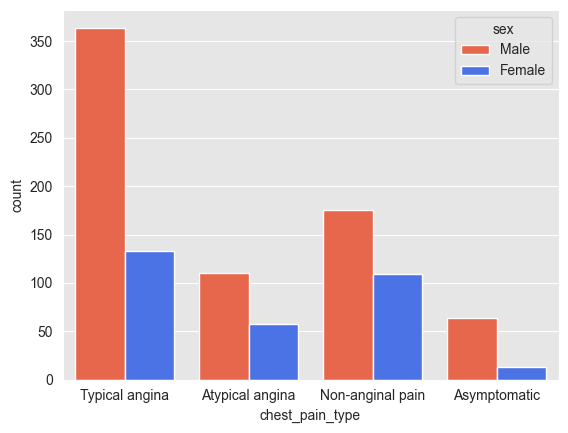

In [17]:
sns.countplot(df, x='chest_pain_type', hue= 'sex')

In [18]:
df['thalassemia'].value_counts()

thalassemia
Fixed Defect         544
Reversable Defect    410
Normal                64
No                     7
Name: count, dtype: int64

In [19]:
numerical_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

## Visualizing Numerical Colomns

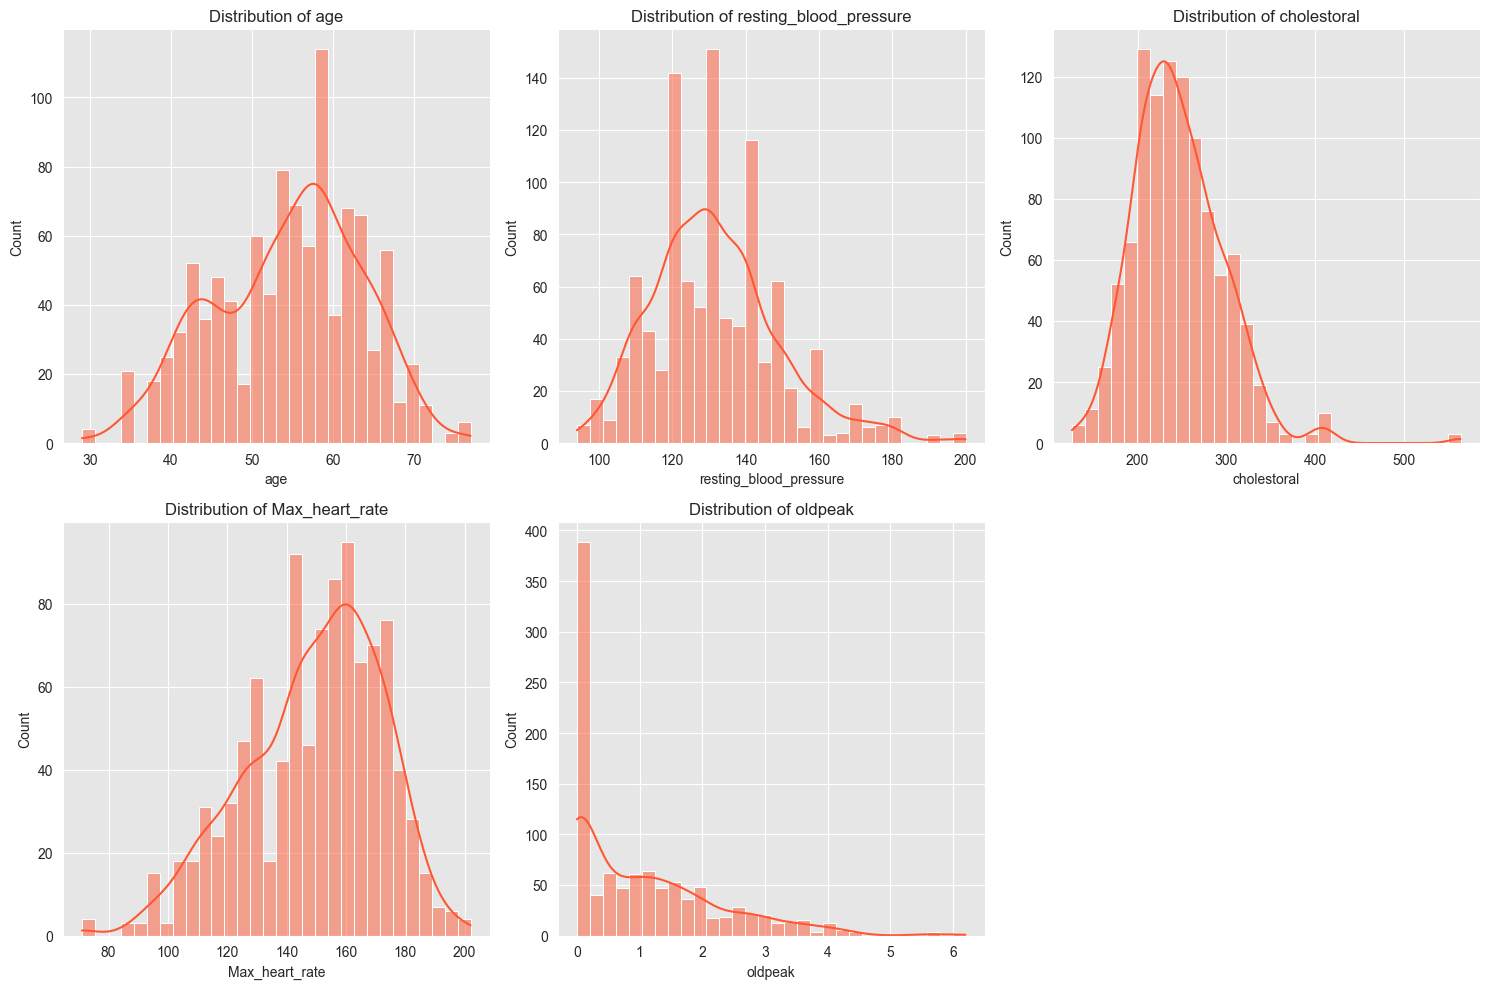

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

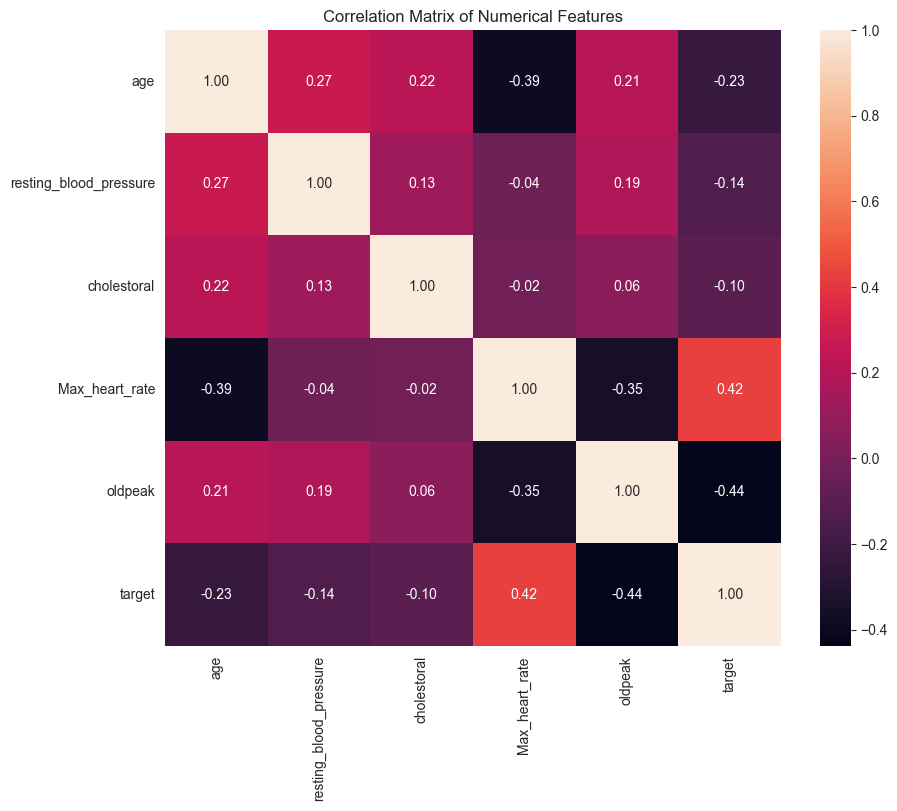

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

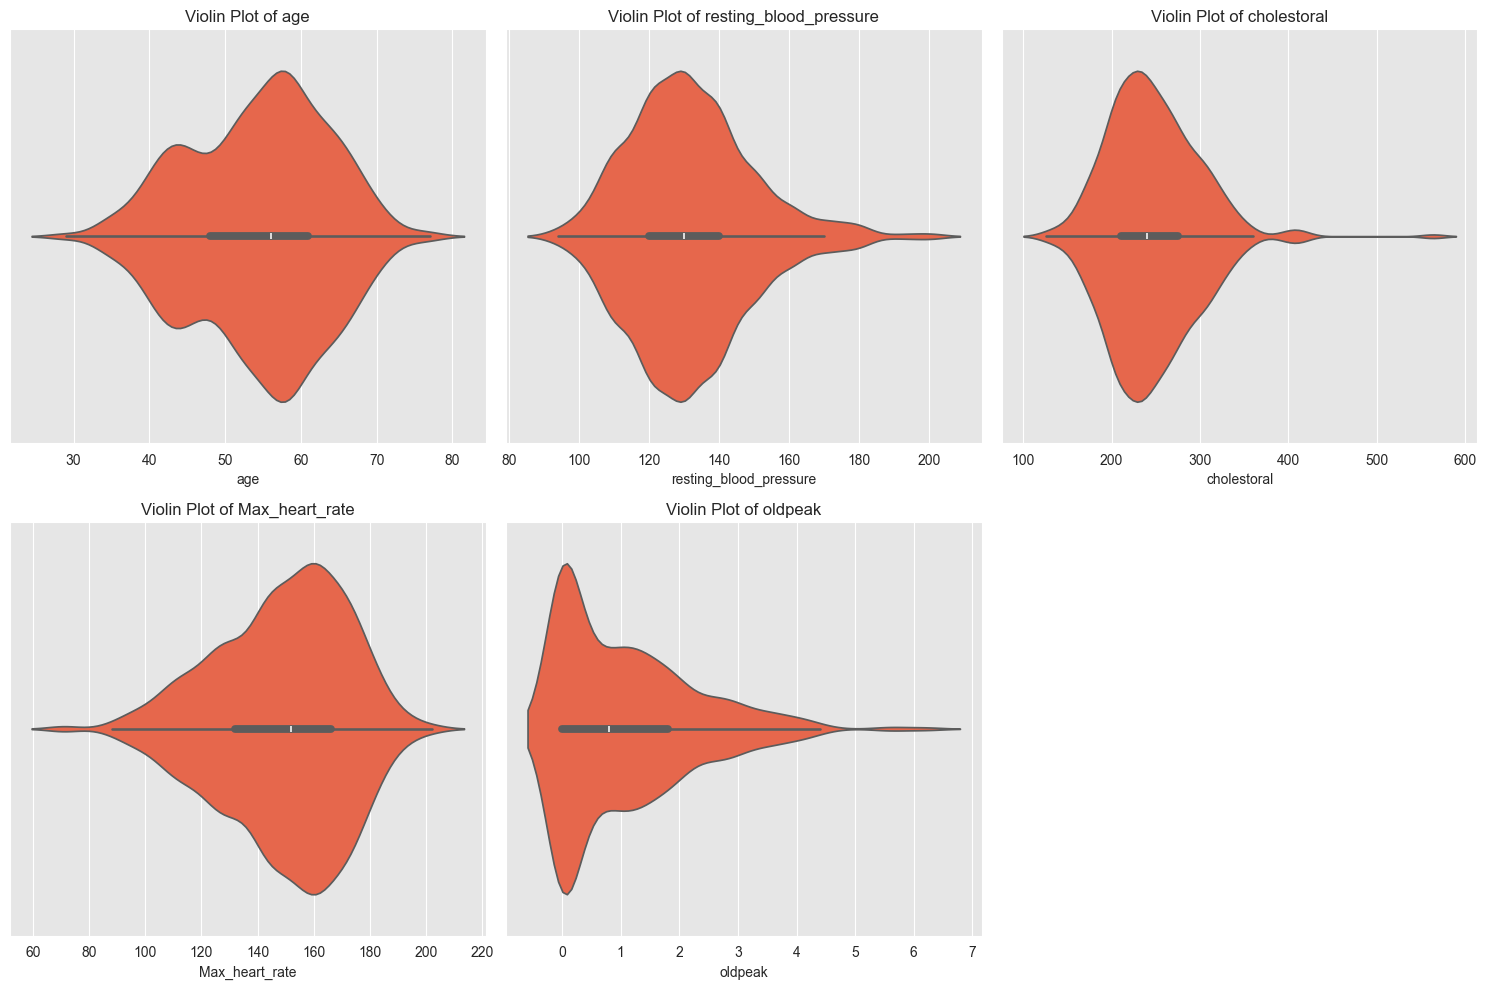

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

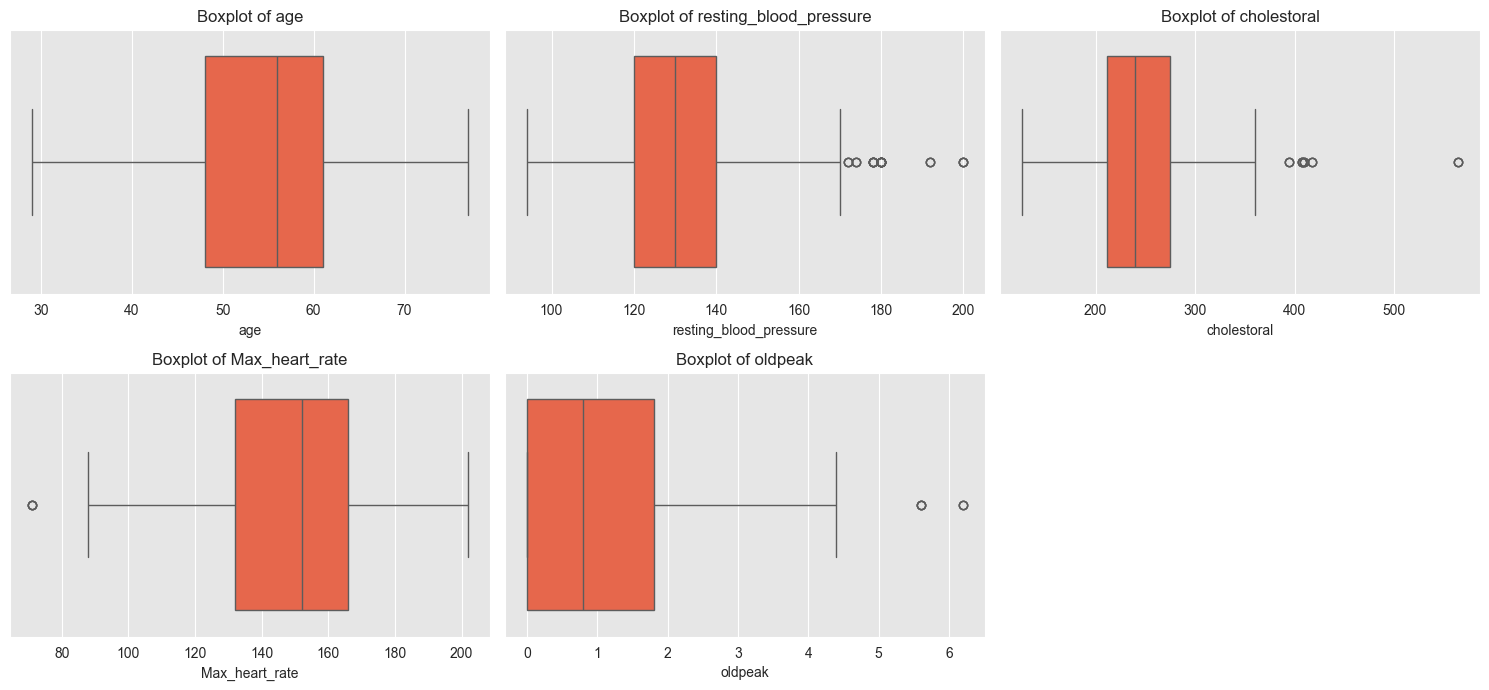

In [23]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Visualizing Categorical Columsn

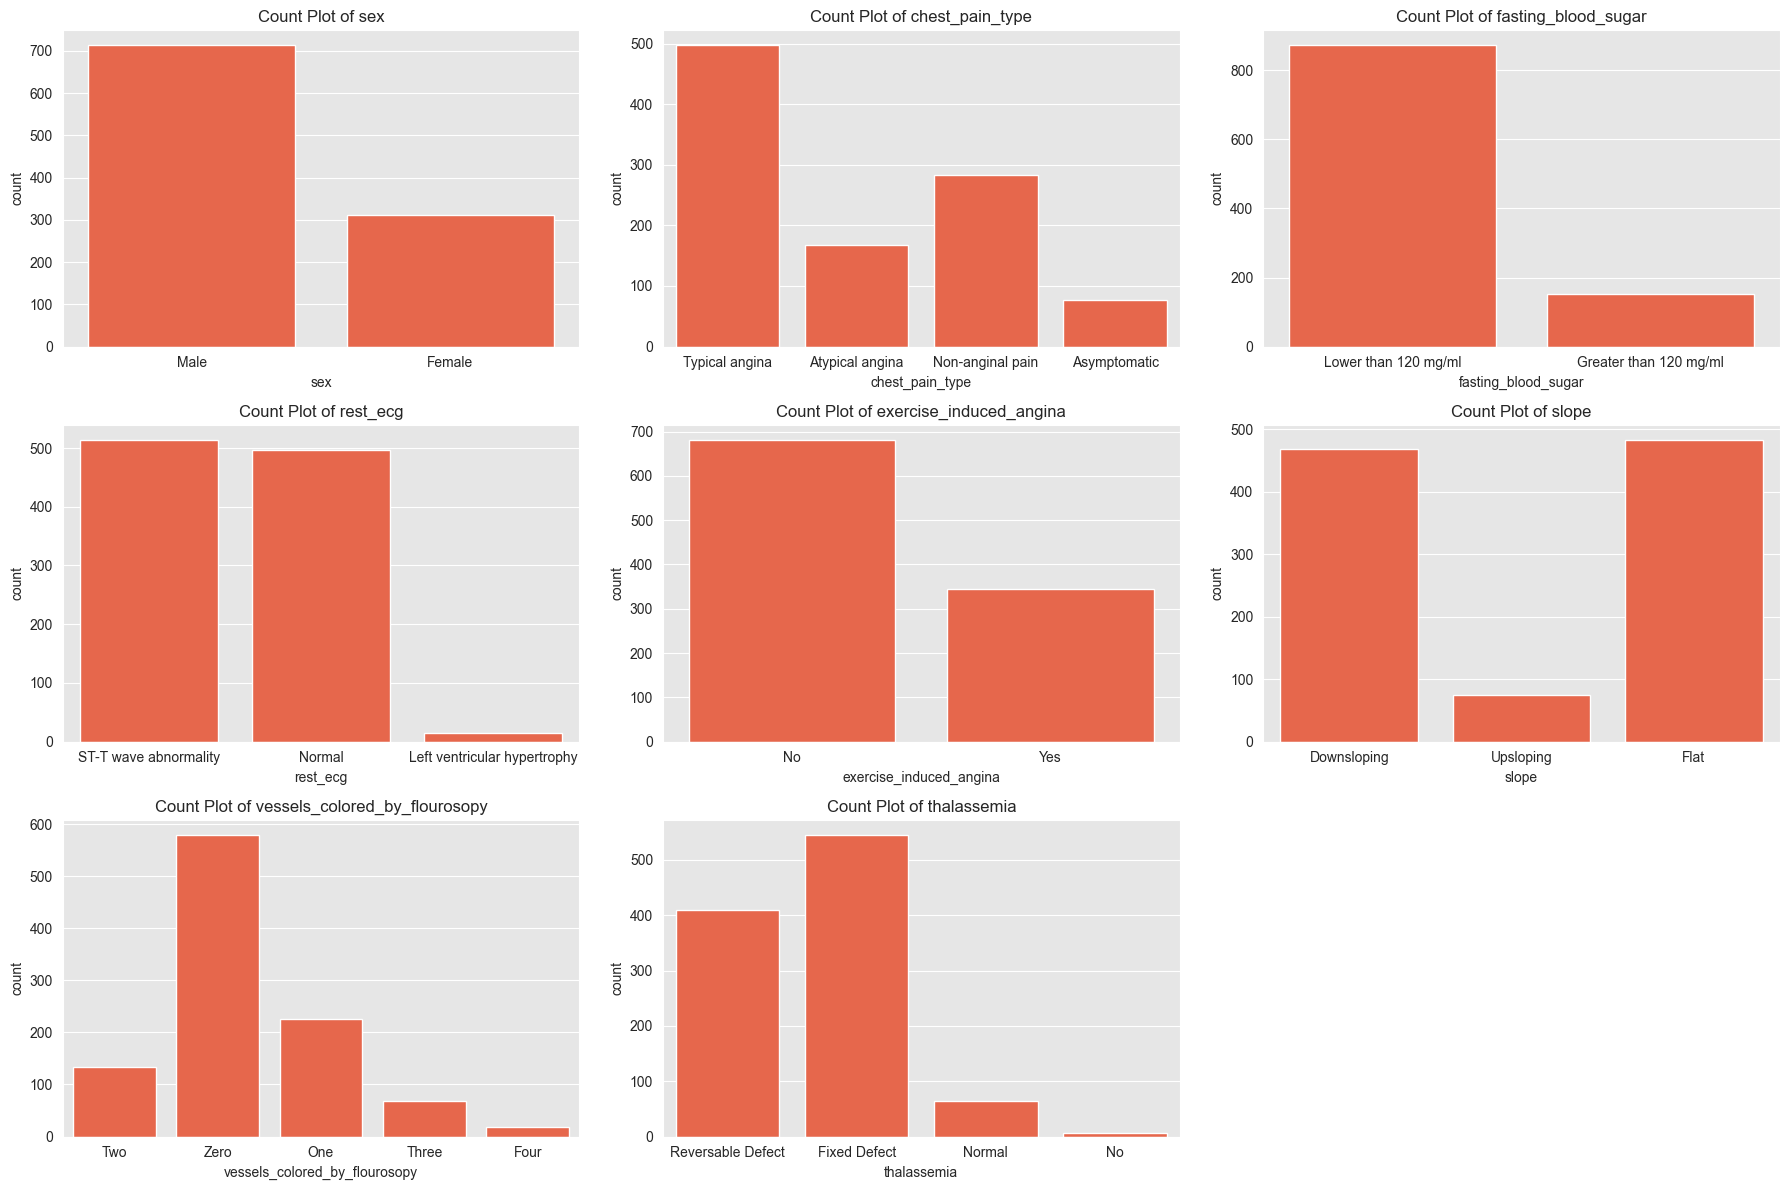

In [24]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

In [25]:
target_counts = df['target'].value_counts().sort_index()
print(target_counts)
target_percent = (target_counts / target_counts.sum()) * 100
print(target_percent)

target
0    499
1    526
Name: count, dtype: int64
target
0    48.682927
1    51.317073
Name: count, dtype: float64


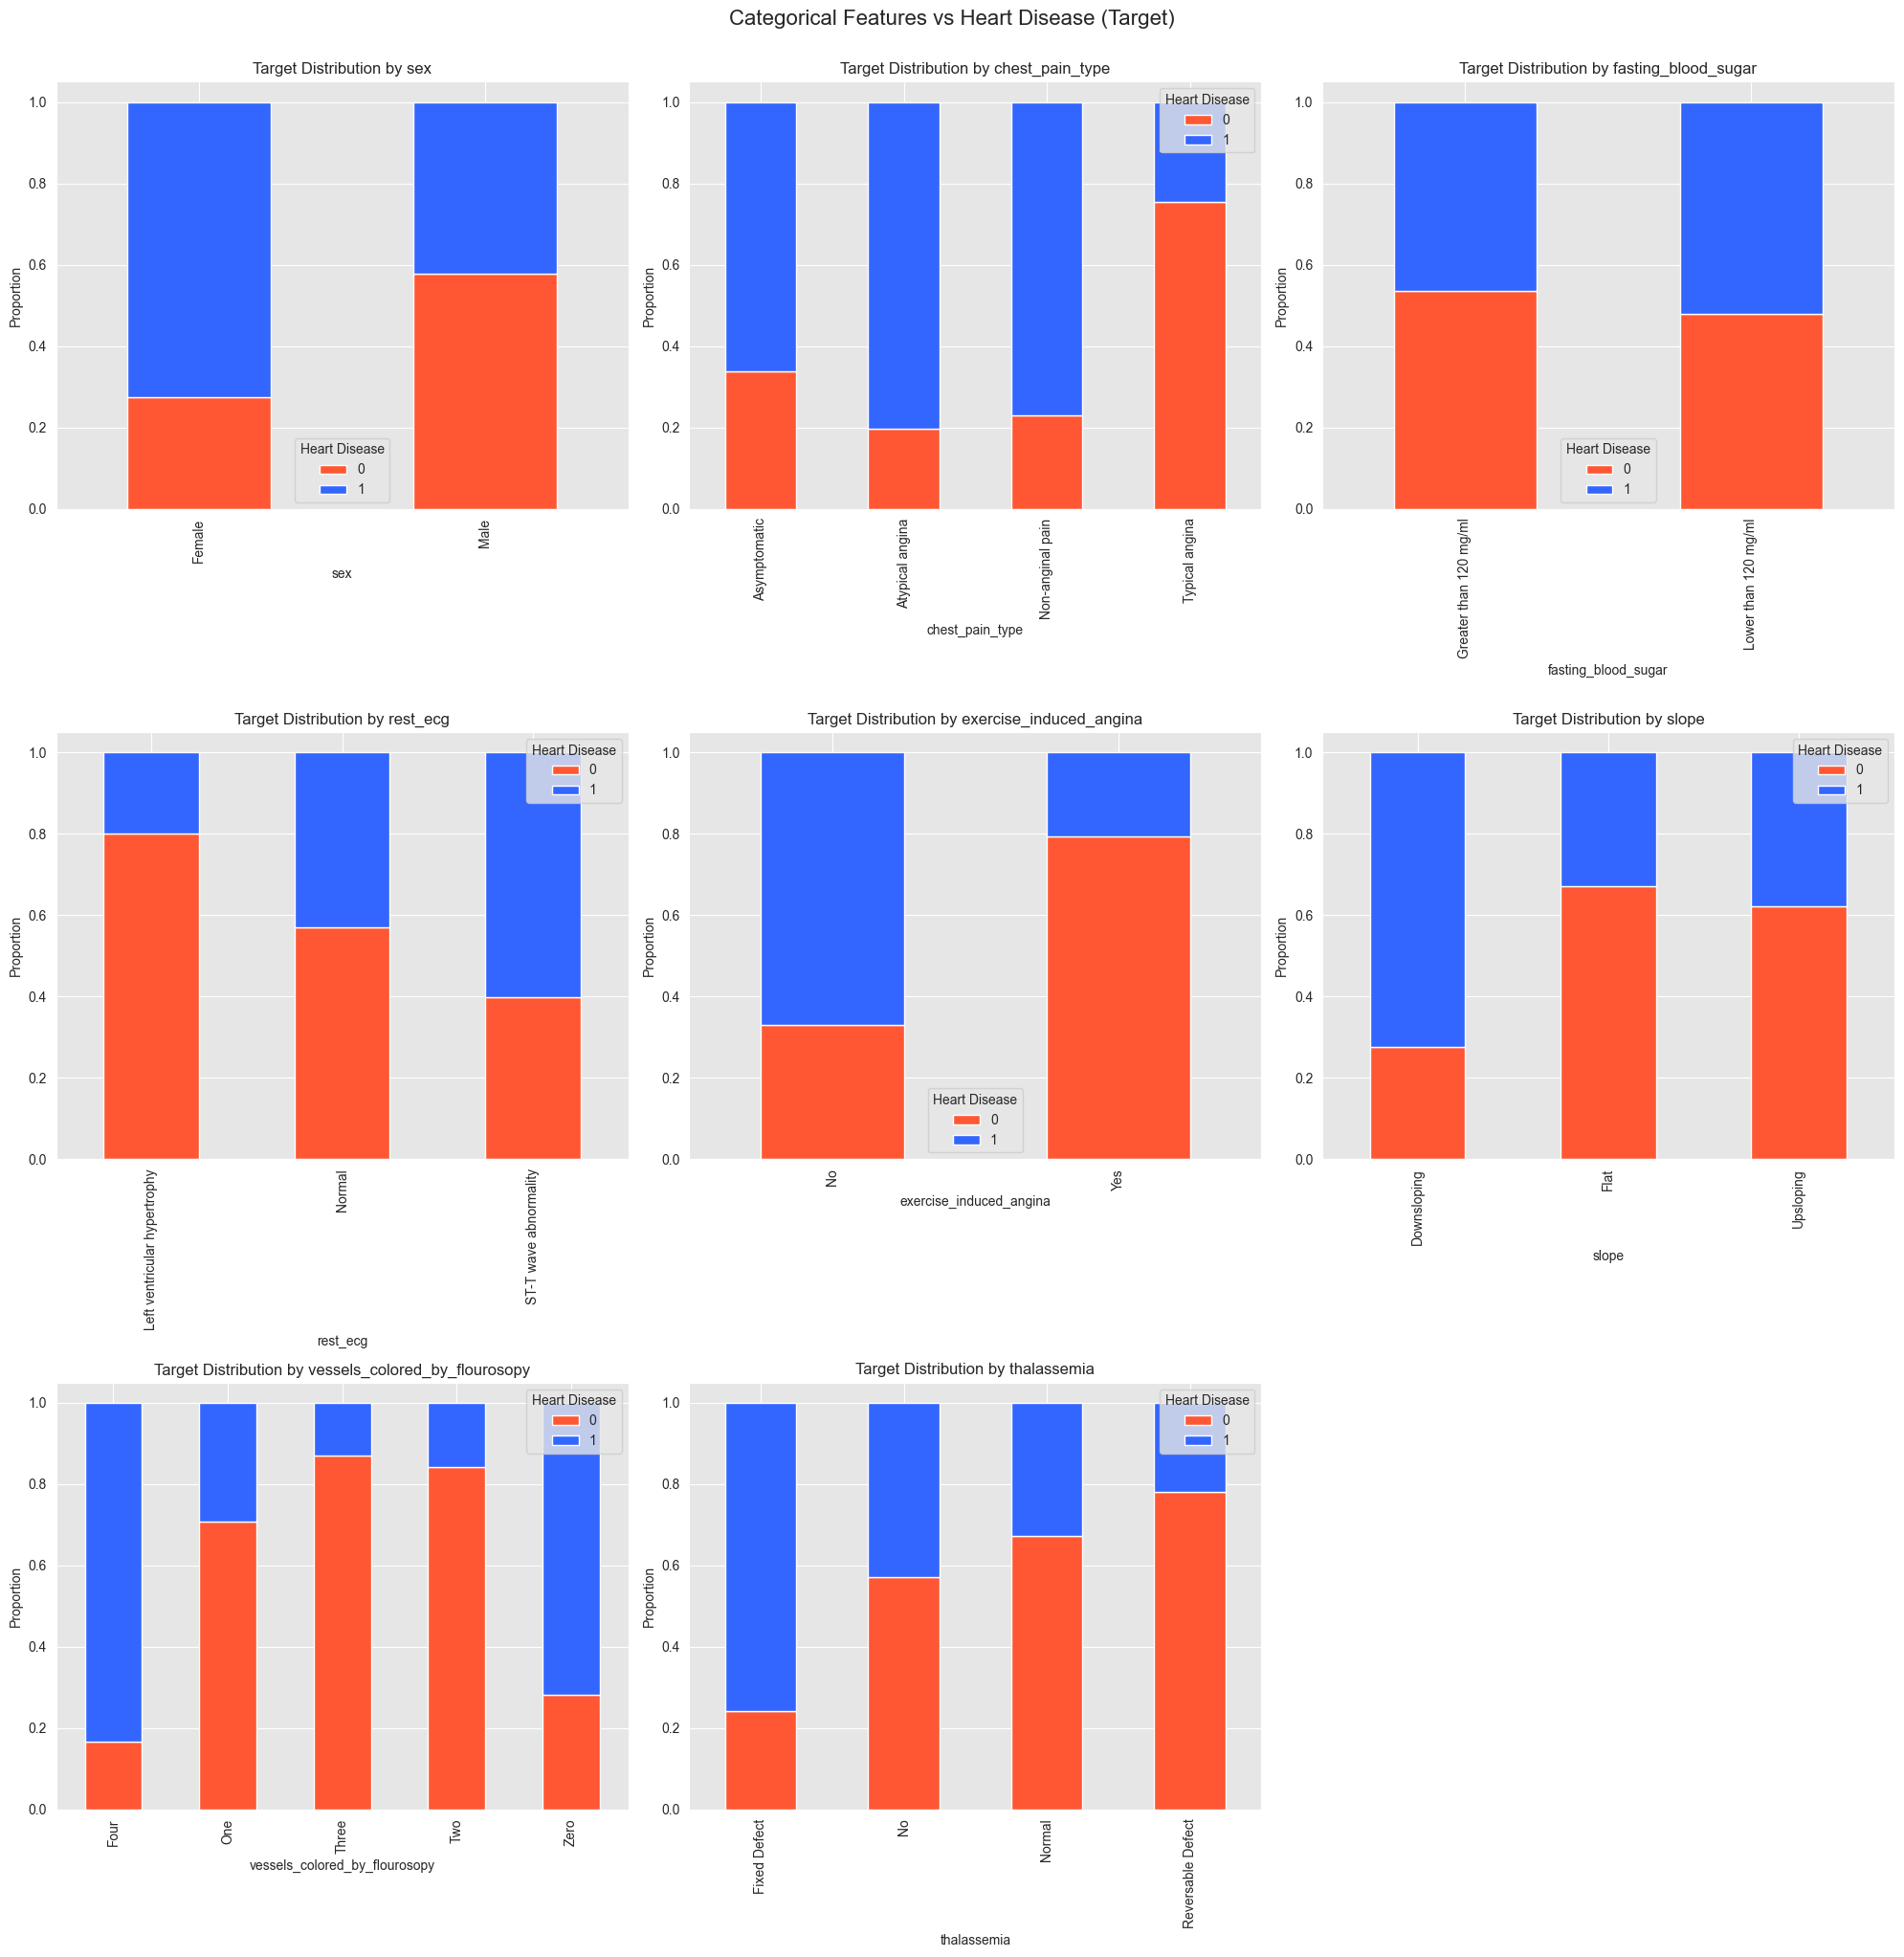

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(df[col], df['target'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Target Distribution by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Heart Disease', loc='best')

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Categorical Features vs Heart Disease (Target)', fontsize=16, y=1.02)
plt.show()

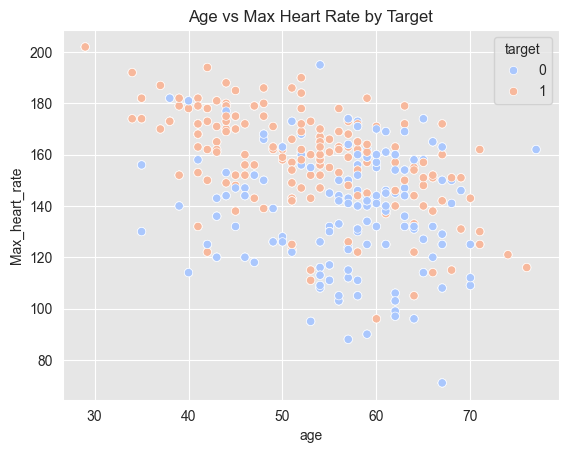

In [27]:
sns.scatterplot(x='age', y='Max_heart_rate', hue='target', data=df, palette='coolwarm')
plt.title("Age vs Max Heart Rate by Target")
plt.show()

## Data Preprocessing

## Encoding

In [28]:
df['vessels_colored_by_flourosopy'].value_counts()


vessels_colored_by_flourosopy
Zero     578
One      226
Two      134
Three     69
Four      18
Name: count, dtype: int64

In [29]:
oe = OrdinalEncoder(categories=[['Zero', 'One', 'Two', 'Three', 'Four']])
df['vessels_colored_by_flourosopy'] = oe.fit_transform(df[['vessels_colored_by_flourosopy']])
df['vessels_colored_by_flourosopy'].value_counts()

vessels_colored_by_flourosopy
0.0    578
1.0    226
2.0    134
3.0     69
4.0     18
Name: count, dtype: int64

In [30]:
df['exercise_induced_angina'].value_counts()

exercise_induced_angina
No     680
Yes    345
Name: count, dtype: int64

In [31]:
#ordinal encode exercise_induced_angina
oe = OrdinalEncoder(categories=[['Yes', 'No']])
df['exercise_induced_angina'] = oe.fit_transform(df[['exercise_induced_angina']])
df['exercise_induced_angina'].value_counts()
#sex
oe = OrdinalEncoder(categories=[['Female', 'Male']])
df['sex'] = oe.fit_transform(df[['sex']])
df['sex'].value_counts()

sex
1.0    713
0.0    312
Name: count, dtype: int64

In [32]:
cols=['chest_pain_type','fasting_blood_sugar','rest_ecg','slope','thalassemia']
df_encoded=pd.get_dummies(df,columns=cols,drop_first=True)
print(df_encoded.head())
print(df_encoded.columns)

   age  sex  resting_blood_pressure  cholestoral  Max_heart_rate  \
0   52  1.0                     125          212             168   
1   53  1.0                     140          203             155   
2   70  1.0                     145          174             125   
3   61  1.0                     148          203             161   
4   62  0.0                     138          294             106   

   exercise_induced_angina  oldpeak  vessels_colored_by_flourosopy  target  \
0                      1.0      1.0                            2.0       0   
1                      0.0      3.1                            0.0       0   
2                      0.0      2.6                            0.0       0   
3                      1.0      0.0                            1.0       0   
4                      1.0      1.9                            3.0       0   

   chest_pain_type_Atypical angina  chest_pain_type_Non-anginal pain  \
0                            False                

## Standarization

In [33]:
#standardScaler
X= df_encoded.drop('target',axis=1)
y= df_encoded['target']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,age,sex,resting_blood_pressure,cholestoral,Max_heart_rate,exercise_induced_angina,oldpeak,vessels_colored_by_flourosopy,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Lower than 120 mg/ml,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,-0.268437,0.661504,-0.377636,-0.659332,0.821321,0.712287,-0.060888,1.209221,-0.441179,-0.619085,1.030715,0.418878,-0.970200,0.999025,-0.942158,-0.278950,-0.082923,-0.258065,1.224745
1,-0.158157,0.661504,0.479107,-0.833861,0.255968,-1.403928,1.727137,-0.731971,-0.441179,-0.619085,1.030715,-2.387330,1.030715,-1.000976,-0.942158,3.584878,-0.082923,-0.258065,1.224745
2,1.716595,0.661504,0.764688,-1.396233,-1.048692,-1.403928,1.301417,-0.731971,-0.441179,-0.619085,1.030715,0.418878,-0.970200,0.999025,-0.942158,3.584878,-0.082923,-0.258065,1.224745
3,0.724079,0.661504,0.936037,-0.833861,0.516900,0.712287,-0.912329,0.238625,-0.441179,-0.619085,1.030715,0.418878,-0.970200,0.999025,-0.942158,-0.278950,-0.082923,-0.258065,1.224745
4,0.834359,-1.511706,0.364875,0.930822,-1.874977,0.712287,0.705408,2.179817,-0.441179,-0.619085,1.030715,-2.387330,-0.970200,0.999025,1.061393,-0.278950,-0.082923,-0.258065,-0.816497


## Models Training & Evaluation

In [34]:
#random forest
random_forest=RandomForestClassifier(n_estimators=100,random_state=42)
random_forest.fit(X_scaled,y)
rf_importance=pd.Series(random_forest.feature_importances_,index=X.columns)
rf_importance = rf_importance.sort_values(ascending=False)
print(rf_importance)

vessels_colored_by_flourosopy               0.120362
oldpeak                                     0.117099
Max_heart_rate                              0.107342
chest_pain_type_Typical angina              0.103012
thalassemia_Reversable Defect               0.093856
age                                         0.088150
cholestoral                                 0.074066
resting_blood_pressure                      0.073210
exercise_induced_angina                     0.062379
sex                                         0.034878
slope_Flat                                  0.032421
chest_pain_type_Non-anginal pain            0.030087
rest_ecg_ST-T wave abnormality              0.013934
rest_ecg_Normal                             0.013549
fasting_blood_sugar_Lower than 120 mg/ml    0.010079
chest_pain_type_Atypical angina             0.009760
slope_Upsloping                             0.007256
thalassemia_Normal                          0.006999
thalassemia_No                              0.

In [35]:
#RFE
selector=RFE(random_forest,n_features_to_select=10 )
selector=selector.fit(X_scaled,y)
selected_features=X.columns[selector.support_]
print(selected_features)

Index(['age', 'sex', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'vessels_colored_by_flourosopy',
       'chest_pain_type_Typical angina', 'thalassemia_Reversable Defect'],
      dtype='object')


In [36]:
chi_scores,p_values=chi2(X,y)
# Create results table
chi_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2': chi_scores,
    'p-value': p_values
}).sort_values('p-value')

print(chi_results)

                                     Feature        Chi2        p-value
4                             Max_heart_rate  650.008493  2.224662e-143
6                                    oldpeak  253.653461   4.149300e-57
7              vessels_colored_by_flourosopy  210.625919   1.003018e-47
10            chest_pain_type_Typical angina  142.563300   7.323424e-33
18             thalassemia_Reversable Defect  141.524151   1.235747e-32
3                                cholestoral  110.723364   6.803149e-26
0                                        age   81.425368   1.820066e-19
9           chest_pain_type_Non-anginal pain   75.643418   3.398067e-18
14                                slope_Flat   66.295938   3.880576e-16
5                    exercise_induced_angina   66.194809   4.084870e-16
8            chest_pain_type_Atypical angina   55.917533   7.557555e-14
2                     resting_blood_pressure   45.974069   1.198287e-11
1                                        sex   24.373650   7.934

['Max_heart_rate', 'oldpeak', 'vessels_colored_by_flourosopy', 'chest_pain_type_Typical angina', 'thalassemia_Reversable Defect', 'cholestoral']


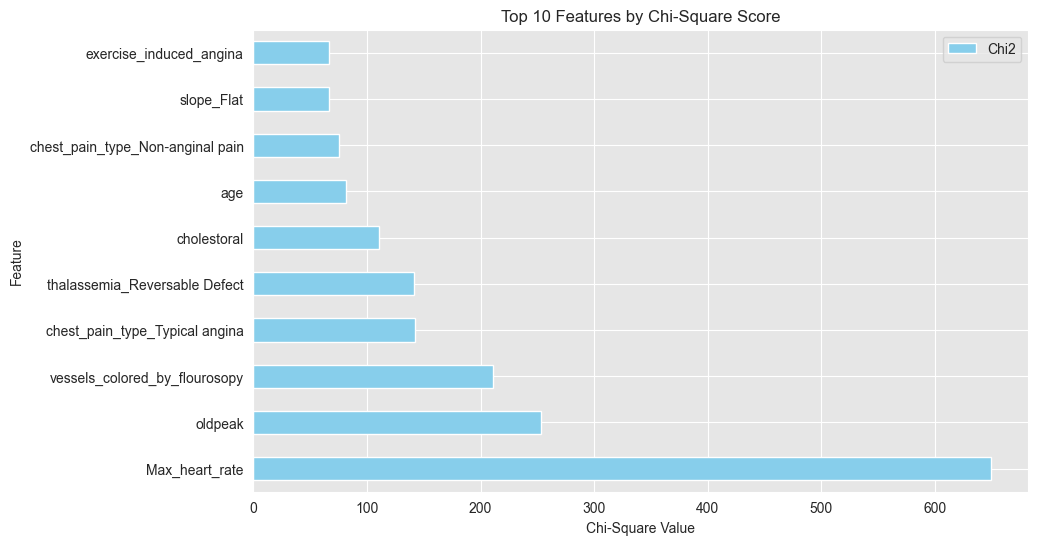

In [37]:
#select significant fetaures
significant_features=chi_results[chi_results['Chi2']>100]['Feature'].tolist()
print(significant_features)
#horizontail bar plot
chi_results.sort_values('Chi2', ascending=False).head(10).plot.barh(
    x='Feature',
    y='Chi2',
    color='skyblue',
    figsize=(10,6)
)
plt.title('Top 10 Features by Chi-Square Score')
plt.xlabel('Chi-Square Value')
plt.show()

In [38]:
X_top_features = X_scaled_df[significant_features]

#split data for training and testing
x_train, x_test, y_train, y_test=train_test_split(X_top_features,y,test_size=0.2,random_state=42,stratify=y)
print("Shapes after split:")
print(f"X_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {x_test.shape}, y_test: {y_test.shape}")

Shapes after split:
X_train: (820, 6), y_train: (820,)
X_test: (205, 6), y_test: (205,)


In [39]:
lr_model=LogisticRegression(random_state=42)
lr_model.fit(x_train,y_train)

y_pred_lr=lr_model.predict(x_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       100
           1       0.82      0.89      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [40]:
dt_model=DecisionTreeClassifier(max_depth=3, min_samples_split=10,random_state=42)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       100
           1       0.79      0.91      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [43]:
rf_model=RandomForestClassifier(random_state=42)
# rf_model.fit(x_train,y_train)
# y_pred_rf=rf_model.predict(x_test)
# print(classification_report(y_test,y_pred_rf))
#tune
param_grid={
    'n_estimators':[100,150,200],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10]
}

gridSearch=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5,scoring='accuracy', n_jobs=1, verbose=1)
gridSearch.fit(x_train,y_train)

print("best parameters",gridSearch.best_params_)
print("best cv score",gridSearch.best_score_)

best_rf=gridSearch.best_estimator_
y_pred_rf=best_rf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best parameters {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
best cv score 0.9560975609756099
Test Accuracy: 0.9707317073170731
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       100
           1       0.95      1.00      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [44]:
svm_model=SVC(random_state=42)
svm_model.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       100
           1       0.84      0.93      0.89       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [45]:
#xgboost
from xgboost import XGBClassifier
xgb_model=XGBClassifier(random_state=42)
xgb_model.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## save best model as .pkl

In [46]:
import pickle

with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)